In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('Desktop/FYPJ Dataset.xlsx', sheet_name = 'Sheet1')

In [2]:
pd.options.display.max_rows = 65
pd.options.display.max_columns = 65

In [ ]:
# Unique ID = 590
count = df
ID = pd.DataFrame({'Id' : count['Unique_Identifier']})
ID = ID.groupby('Id')['Id'].size()
# pd.options.display.max_rows = 590
ID.head()

In [ ]:
s = df
s = pd.Series(s.Unique_Identifier)
s.value_counts().head()

In [ ]:
np.unique(df['Nationality'])

In [ ]:
df['Nationality'].groupby(df['Nationality']).count().plot(kind="bar")

In [ ]:
np.unique(df['Threshold_Text_1'])

In [ ]:
np.unique(df['Name'])

In [ ]:
np.unique(df['Conclusion'])

In [ ]:
df['Conclusion'].groupby(df['Conclusion']).count().plot(kind="pie")

In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [ ]:
# Id + Nationality, Date + Test Name + Conclusion
Results = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Nationality' : df['Nationality'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})

Results.groupby(["Id", "Nationality", "Date", "Name", "Score", "Conclusion"]).count()

In [ ]:
# No ID and Date
##################################################################################
yTestStats = pd.DataFrame({'Name' : df['Name'], 'Conclusion' : df['Conclusion']})
textReplace = {'Desirable': 0, 'High': 1, 'Low': 1}
yTestStats.Conclusion = [textReplace[i] for i in yTestStats.Conclusion]

yTestStats = yTestStats.set_index(['Name'], append=True)
yTestStats = yTestStats.unstack('Name')

yTestStats = yTestStats.replace({0 : 1})
yTestStats[np.isnan(yTestStats)] = 0

yTestStats.columns = ['Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
yTestStats

In [ ]:
yTestStats = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})

#yTestStats = yTestStats.groupby(["Id", "Date", "Conclusion", "Name"]).mean()
#yTestStats = yTestStats.reset_index()

#yTestStats = yTestStats.groupby(['Id','Date','Conclusion','Score','Name'])[['Name']].count().unstack(fill_value=0)

yTestStats = yTestStats.pivot_table(index=['Id','Date','Conclusion'], columns = 'Name', values='Score').reset_index()
#yTestStats = yTestStats.pivot_table(index=['Id','Date','Conclusion'], columns = 'Name', values='Score', fill_value='NA').reset_index()
yTestStats.columns = ['Id', 'Date', 'Conclusion', 'Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
#yTestStats.info()

yTestStats

In [ ]:
# Conclusion based on Glucose, all test based on conclusion
##########################################################################################

yTestStats = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})

#yTestStats = yTestStats.groupby(["Id", "Date", "Conclusion", "Name"]).mean()
#yTestStats = yTestStats.reset_index()

#yTestStats = yTestStats.groupby(['Id','Date','Conclusion','Score','Name'])[['Name']].count().unstack(fill_value=0)

yTestStats = yTestStats.pivot_table(index=['Id','Date', 'Conclusion'], columns = 'Name', values='Score').reset_index()
#yTestStats = yTestStats.pivot_table(index=['Id','Date','Conclusion'], columns = 'Name', values='Score', fill_value='NA').reset_index()
yTestStats.columns = ['Id', 'Date', 'Conclusion', 'Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
#yTestStats.info()

yTestStats = yTestStats[yTestStats.Glucose.notnull()]
yTestStats

In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [3]:
testScorez = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score']})

testScorez = testScorez.pivot_table(index=['Id','Date'], columns = 'Name', values='Score').reset_index()
testScorez.columns = ['Id', 'Date', 'Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
#testScorez = testScorez[testScorez.Glucose.notnull()]
testScorez.Glucose = testScorez.Glucose.fillna(0)

conclusionz = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})
conclusionz = conclusionz.pivot_table(index=['Id','Date', 'Conclusion'], columns = 'Name', values='Score').reset_index()
conclusionz.columns = ['Id', 'Date', 'Conclusion', 'Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
conclusionz = conclusionz[conclusionz.Glucose.notnull()]


testScorez['Conclusion'] = 0
testScorez.loc[testScorez.Glucose == 0, 'Conclusion'] = 'Not high'
testScorez.loc[testScorez.Glucose != 0, 'Conclusion'] = conclusionz['Conclusion'].values
testScorez

,Id,Date,Albumin,Alkaline Phosphatase,Alpha Feto- Protein,Basophils,Calcium,Carcino-embryonic Antigen,Chloride,Creatinine,Direct Bilirubin,E.S.R,Eosinophils,Free T 4,Gamma Glutamyltransferase,Globulin,Glucose,HDL Cholesterol,Haematocrit,Haemoglobin,HbA1c,Hepatitis A Antibodies,Hepatitis A Antigen,Hepatitis Bs Antibodies,Inorganic Phosphate,LDL Cholesterol,Lymphocytes,MCH,MCHC,MCV,Monocytes,Peipheral Blood film,Platelet,Polymorph,Potassium,Sodium,Stool Occult Blood,T.Chol/HDL Cholesterol Ratio,TSH,Total Cholesterol,Total Protein,Total Red Cell count,Total White Cell count,Triglycerides,Urea,Uric Acid,Urine Bilirubin,Urine Blood,Urine Casts,Urine Crystal,Urine Epithelial cell,Urine Glucose,Urine Ketone,Urine Micro organism,Urine Nitrite,Urine PH,Urine Protein,Urine Red Blood Cell,Urine Urobilinogen,Urine White Blood cell,Urine specific gravity,Urine white blood cell,e GFR,Conclusion
0,003d25e3fac5a1d2aa4ba502ffb77b5b,2017-05-24,4.7,40.0,NaN,0.5,9.5,NaN,107.0,0.8,0.78,22.0,5.6,NaN,16.0,3.2,91.0,57.0,38.0,12.7,NaN,NaN,0.0,0.0,3.4,92.0,36.0,31.0,34.0,93.0,9.9,0.0,197.0,48.0,3.5,142.0,NaN,2.95,NaN,168.0,7.9,4.05,6.6,98.0,32.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,High
1,0079e1b73a94ba341f53ca22c6910782,2016-01-14,3.9,50.0,NaN,1.0,NaN,NaN,98.0,1.1,0.48,41.0,3.9,NaN,16.0,3.7,93.0,64.0,38.0,12.2,NaN,NaN,0.0,0.0,NaN,147.0,36.0,29.0,32.0,90.0,8.6,0.0,301.0,50.5,4.2,130.0,NaN,3.81,NaN,244.0,7.6,4.20,7.0,169.0,42.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,High
2,0079e1b73a94ba341f53ca22c6910782,2016-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.79,NaN,170.0,NaN,NaN,NaN,114.0,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not high
3,0079e1b73a94ba341f53ca22c6910782,2016-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not high
4,00d64d073ff05912189aa31bf8ce5d17,2017-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not high
5,00f3ce1c7437a60280aa0268e74550ef,2016-10-16,4.0,95.0,2.18,1.0,9.0,3.52,103.0,0.7,1.12,55.0,3.2,12.73,19.0,2.8,85.0,47.0,38.0,12.7,NaN,0.0,0.0,0.0,4.4,113.0,16.6,32.0,33.0,95.0,7.2,0.0,447.0,72.0,3.7,140.0,NaN,3.72,2.8870,175.0,6.8,4.02,10.0,76.0,27.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.0,0.0,0.0,0.0,1.010,0.0,0.0,High
6,00f3ce1c7437a60280aa0268e74550ef,2017-09-09,4.3,121.0,2.58,0.4,9.5,2.65,103.0,0.7,0.61,97.0,3.0,13.14,17.0,4.0,76.0,61.0,39.0,13.1,NaN,0.0,0.0,0.0,3.9,117.0,18.6,30.0,33.0,91.0,4.9,0.0,360.0,73.1,3.6,141.0,NaN,3.10,4.1569,189.0,8.3,4.30,10.0,59.0,40.0,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,High
7,00f3ce1c7437a60280aa0268e74550ef,2017-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.010,0.0,NaN,Not high
8,020971cfb58c7bc5efaf56eac237eeef,2016-11-09,4.3,75.0,5.05,0.1,9.7,1.12,103.0,0.8,0.83,19.0,3.1,13.53,33.0,3.0,129.0,74.0,46.0,14.9,NaN,0.0,0.0,0.0,3.1,162.0,27.4,29.0,33.0,89.0,7.0,0.0,247.0,62.4,3.9,141.0,0.0,3.39,1.0664,251.0,7.3,5.14,6.9,78.0,24.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.005,0.0,0.0,High
9,021ded5c60a28a425a50a8a580f5a0a1,2017-11-11,4.5,53.0,NaN,0.4,9.6,NaN,101.0,0.8,0.59,98.0,2.6,NaN,29.0,3.9,88.0,38.0,46.0,15.3,NaN,NaN,0.0,0.0,3.3,191.0,33.9,29.0,34.0,86.0,6.2,0.0,242.0,56.9,4.0,138.0,NaN,6.76,NaN,257.0,8.4,5.29,4.6,142.0,20.0,6.9,NaN,NaN,NaN,

In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [ ]:
testScore = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score']})

testScore = testScore.pivot_table(index=['Id','Date'], columns = 'Name', values='Score').reset_index()
testScore.columns = ['Id', 'Date', 'Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
testScore = testScore[testScore.Glucose.notnull()]

conclusion = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Score' : df['Score'], 'Conclusion' : df['Conclusion']})
conclusion = conclusion.pivot_table(index=['Id','Date', 'Conclusion'], columns = 'Name', values='Score').reset_index()
conclusion.columns = ['Id', 'Date', 'Conclusion', 'Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
conclusion = conclusion[conclusion.Glucose.notnull()]

testScore['Conclusion'] = conclusion['Conclusion'].values
testScore

In [ ]:
###################### ---- ######################

yTestStats = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Date' : df['Test_Date'], 'Name' : df['Name'], 'Conclusion' : df['Conclusion']})
textReplace = {'Desirable': 'Desirable', 'High': 'Non-Desirable', 'Low': 'Non-Desirable'}
yTestStats.Conclusion = [textReplace[i] for i in yTestStats.Conclusion]
yTestStats.groupby(["Id", "Date", "Conclusion", "Name"])[['Name']].count().unstack(fill_value=0).reset_index()

#yTestStats.info()

In [ ]:
# Id + Gender + Nationality, Profile_Name + Age + Test_Date, Test Name
NewResults = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Profile_Name' : df['Profile_Name'], 'Gender' : df['Gender'], 'Age' : df['Age'],'Nationality' : df['Nationality'], 'Test_Date' : df['Test_Date'], 'Name' : df['Name'], 'Conclusion' : df['Conclusion']})

NewResults.groupby(['Id', 'Gender', 'Nationality', 'Profile_Name', 'Age', 'Test_Date', 'Name']).count().unstack(fill_value=0)


In [ ]:
#Array
abc = NewResults.groupby(['Id', 'Gender', 'Nationality', 'Profile_Name', 'Age', 'Test_Date', 'Name']).count().unstack(fill_value=0)

#abc.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61']
ddd = abc.loc['003d25e3fac5a1d2aa4ba502ffb77b5b':'ffa1c31426a5f26e26860382fc9ae454']
#ddd = ddd.loc['Conclusion']
ddd.values

#ddd = [[i] for i in ddd.values]
#ddd



In [ ]:
zResults = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Gender' : df['Gender'], 'Test_Date' : df['Test_Date'], 'Age' : df['Age'], 'Name' : df['Name'], 'Conclusion' : df['Conclusion']})
#textReplace = {'Desirable': 0, 'High': 1, 'Low': 1}
#zResults.Conclusion = [textReplace[i] for i in zResults.Conclusion]

abcd = zResults.groupby(['Id', 'Gender', 'Test_Date', 'Age', 'Name']).count().unstack(fill_value=0)
abcd = abcd.loc['003d25e3fac5a1d2aa4ba502ffb77b5b':'ffa1c31426a5f26e26860382fc9ae454']

#abcd['Conclusion', 'Conclusion'] = zResults['Conclusion']
#abcd = abcd.sort_index()
abcd
#yyy = ['Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'Glucose', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
#yyy


In [ ]:
# Test name + Conclusion -- stats
TestStats = pd.DataFrame({'Name' : df['Name'], 'Conclusion' : df['Conclusion']})
TestStats.groupby(["Name", "Conclusion"])[['Conclusion']].count()

In [ ]:
testoutput = pd.DataFrame({'Id' : df['Unique_Identifier'], 'Gender' : df['Gender'], 'Date' : df['Test_Date'], 'Age' : df['Age'], 'Name' : df['Name'], 'Conclusion' : df['Conclusion']})
testoutput = testoutput.groupby(['Id', 'Date', 'Name']).count().unstack(fill_value=0)
testoutput

In [ ]:
########## Import dataframe to excel ##########

#import xlsxwriter
#writer = pd.ExcelWriter('Desktop/testoutput3.xlsx')
#testScorez.to_excel(writer,'Sheet1')
#writer.save()




In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [ ]:
# Correlation matrix
test = pd.read_excel('Desktop/FYPJ Dataset.xlsx', sheet_name = 'Sheet3')
test.corr()

In [ ]:
def plot_corr(test, size=8):
    corr = test.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [ ]:
# Yellow colour represents maximum correlation
# Blue colour represents minimum correlation
plot_corr(test)

In [ ]:
np.unique(test['Conclusion'])

In [ ]:
# 16.43% - High/Low
# 83.57% - Desirable

n_true = len(test.loc[test['Conclusion'] == True])
n_false = len(test.loc[test['Conclusion'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

In [ ]:
# Splitting the data

features_cols = ['Threshold_2', 'Score_Level', 'SI_Conversion', 'Age', 'Threshold_1', 'Score']
predicted_class = ['Conclusion']
X = test[features_cols].values # Predictor feature columns (6 X m)
Y = test[predicted_class].values # Predicted class (1=True, 0=False) (1 X m)
split_test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=52)

In [ ]:
# Check split of data

print("{0:0.2f}% data is in training set".format((len(x_train)/len(test.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(test.index)) * 100))

In [ ]:
# Check True/False ratio in split data

print("Original Diabetes True Values   : {0} ({1:0.2f}%)".format(len(test.loc[test['Conclusion'] == 1]), (len(test.loc[test['Conclusion'] == 1])/len(test.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(test.loc[test['Conclusion'] == 0]), (len(test.loc[test['Conclusion'] == 0])/len(test.index)) * 100))
print("")
print("Training Diabetes True Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values   : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

In [ ]:
                    ######################## ######################## ######################## ########################
                ####################### ######################## ######################## ########################
            ###################### ######################## ######################## ########################
        ##################### ######################## ######################## ########################
    ################### ######################## ######################## ########################

In [4]:
# Glucose is left out of the dataframe

################# Fields with only 0.0 for both High and Not High #################
# Hepatitis A Antibodies
# Hepatitis A Antigen
# Hepatitis Bs Antibodies
# Peipheral Blood film
# Stool Occult Blood
# Urine Bilirubin
# Urine Blood
# Urine Casts
# Urine Crystal
# Urine Epithelial cell
# Urine Glucose
# Urine Ketone
# Urine Micro organism
# Urine Nitrite
# Urine Protein
# Urine Red Blood Cell
# Urine Urobilinogen
# Urine White Blood cell
# Urine white blood cell

################# Fields containing null value for 1 of the conclusion #################
# HbA1c (Not high)


ooo = pd.read_excel('Desktop/testoutput3.xlsx', sheet_name = 'Sheet1')
example = ooo
example = pd.DataFrame({ 'Id' : ooo['Id'],  
                         'Test_Date' : ooo['Date'], 
                         'Albumin' : ooo['Albumin'], 
                         'Alkaline Phosphatase' : ooo['Alkaline Phosphatase'], 
                         'Alpha Feto- Protein' : ooo['Alpha Feto- Protein'], 
                         'Basophils' : ooo['Basophils'], 
                         'Calcium' : ooo['Calcium'], 
                         'Carcino-embryonic Antigen' : ooo['Carcino-embryonic Antigen'], 
                         'Chloride' : ooo['Chloride'], 
                         'Creatinine' : ooo['Creatinine'], 
                         'Direct Bilirubin' : ooo['Direct Bilirubin'], 
                         'E.S.R' : ooo['E.S.R'], 
                         'Eosinophils' : ooo['Eosinophils'], 
                         'Free T 4' : ooo['Free T 4'], 
                         'Gamma Glutamyltransferase' : ooo['Gamma Glutamyltransferase'], 
                         'Globulin' : ooo['Globulin'], 
                         #'Glucose' : ooo['Glucose'], 
                         'HDL Cholesterol' : ooo['HDL Cholesterol'], 
                         'Haematocrit' : ooo['Haematocrit'], 
                         'Haemoglobin' : ooo['Haemoglobin'], 
                         'HbA1c' : ooo['HbA1c'], 
                         'Hepatitis A Antibodies' : ooo['Hepatitis A Antibodies'], 
                         'Hepatitis A Antigen' : ooo['Hepatitis A Antigen'], 
                         'Hepatitis Bs Antibodies' : ooo['Hepatitis Bs Antibodies'], 
                         'Inorganic Phosphate' : ooo['Inorganic Phosphate'], 
                         'LDL Cholesterol' : ooo['LDL Cholesterol'], 
                         'Lymphocytes' : ooo['Lymphocytes'], 
                         'MCH' : ooo['MCH'], 
                         'MCHC' : ooo['MCHC'], 
                         'MCV' : ooo['MCV'], 
                         'Monocytes' : ooo['Monocytes'], 
                         'Peipheral Blood film' : ooo['Peipheral Blood film'], 
                         'Platelet' : ooo['Platelet'], 
                         'Polymorph' : ooo['Polymorph'], 
                         'Potassium' : ooo['Potassium'], 
                         'Sodium' : ooo['Sodium'], 
                         'Stool Occult Blood' : ooo['Stool Occult Blood'], 
                         'T.Chol/HDL Cholesterol Ratio' : ooo['T.Chol/HDL Cholesterol Ratio'], 
                         'TSH' : ooo['TSH'], 
                         'Total Cholesterol' : ooo['Total Cholesterol'], 
                         'Total Protein' : ooo['Total Protein'], 
                         'Total Red Cell count' : ooo['Total Red Cell count'], 
                         'Total White Cell count' : ooo['Total White Cell count'], 
                         'Triglycerides' : ooo['Triglycerides'], 
                         'Urea' : ooo['Urea'], 
                         'Uric Acid' : ooo['Uric Acid'], 
                         'Urine Bilirubin' : ooo['Urine Bilirubin'], 
                         'Urine Blood' : ooo['Urine Blood'], 
                         'Urine Casts' : ooo['Urine Casts'], 
                         'Urine Crystal' : ooo['Urine Crystal'], 
                         'Urine Epithelial cell' : ooo['Urine Epithelial cell'], 
                         'Urine Glucose' : ooo['Urine Glucose'], 
                         'Urine Ketone' : ooo['Urine Ketone'], 
                         'Urine Micro organism' : ooo['Urine Micro organism'], 
                         'Urine Nitrite' : ooo['Urine Nitrite'], 
                         'Urine PH' : ooo['Urine PH'], 
                         'Urine Protein' : ooo['Urine Protein'], 
                         'Urine Red Blood Cell' : ooo['Urine Red Blood Cell'], 
                         'Urine Urobilinogen' : ooo['Urine Urobilinogen'], 
                         'Urine White Blood cell' : ooo['Urine White Blood cell'], 
                         'Urine specific gravity' : ooo['Urine specific gravity'], 
                         'Urine white blood cell' : ooo['Urine white blood cell'], 
                         'e GFR' : ooo['e GFR'], 
                         'Conclusion' : ooo['Conclusion']})

In [ ]:
# Conclusion, AVG / MIN / MAX
    # Desirable: 742
    # High: 670
    # Low: 375

#desirable = example.loc[(example.Conclusion == "Desirable")]
#high = example.loc[(example.Conclusion == "High")]
#low = example.loc[(example.Conclusion == "Low")]


############## Average ##############
#desirableAvg = np.mean(desirable)
#desirableAvg

#highAvg = np.mean(high)
#highAvg

#lowAvg = np.mean(low)
#lowAvg


############## Minimum ##############
#desirableMin = np.min(desirable)
#desirableMin

#highMin = np.mean(high)
#highMin

#lowMin = np.mean(low)
#lowMin


############## Maximum ##############
#desirableMax = np.max(desirable)
#desirableMax

#highMax = np.mean(high)
#highMax

#lowMax = np.mean(low)
#lowMax

In [ ]:
#textReplace = {'Not high': 0, 'High': 1}
#example.Conclusion = [textReplace[i] for i in example.Conclusion]
#example = example.drop(['Id', 'Test_Date'], axis=1)
##values = example.values
##XX = values[:,0:61]
##yy = values[:,61]

In [17]:
example.dtypes

Id                                      object
Test_Date                       datetime64[ns]
Albumin                                float64
Alkaline Phosphatase                   float64
Alpha Feto- Protein                    float64
Basophils                              float64
Calcium                                float64
Carcino-embryonic Antigen              float64
Chloride                               float64
Creatinine                             float64
Direct Bilirubin                       float64
E.S.R                                  float64
Eosinophils                            float64
Free T 4                               float64
Gamma Glutamyltransferase              float64
Globulin                               float64
HDL Cholesterol                        float64
Haematocrit                            float64
Haemoglobin                            float64
HbA1c                                  float64
Hepatitis A Antibodies                 float64
Hepatitis A A

In [5]:
example.Conclusion.value_counts()

High        506
Not high    272
Name: Conclusion, dtype: int64

In [6]:
conHigh = len(example[example['Conclusion']=='High'])
conNHigh = len(example[example['Conclusion']=='Not high'])
pct_of_high = conHigh/(conHigh+conNHigh)
print("Percentage of High Glucose level is", pct_of_high*100)
pct_of_nhigh = conNHigh/(conHigh+conNHigh)
print("percentage of Not high Glucose level is", pct_of_nhigh*100)

Percentage of High Glucose level is 65.03856041131105
percentage of Not high Glucose level is 34.96143958868895


In [7]:
example.groupby('Conclusion').mean()

,Albumin,Alkaline Phosphatase,Alpha Feto- Protein,Basophils,Calcium,Carcino-embryonic Antigen,Chloride,Creatinine,Direct Bilirubin,E.S.R,Eosinophils,Free T 4,Gamma Glutamyltransferase,Globulin,HDL Cholesterol,Haematocrit,Haemoglobin,HbA1c,Hepatitis A Antibodies,Hepatitis A Antigen,Hepatitis Bs Antibodies,Inorganic Phosphate,LDL Cholesterol,Lymphocytes,MCH,MCHC,MCV,Monocytes,Peipheral Blood film,Platelet,Polymorph,Potassium,Sodium,Stool Occult Blood,T.Chol/HDL Cholesterol Ratio,TSH,Total Cholesterol,Total Protein,Total Red Cell count,Total White Cell count,Triglycerides,Urea,Uric Acid,Urine Bilirubin,Urine Blood,Urine Casts,Urine Crystal,Urine Epithelial cell,Urine Glucose,Urine Ketone,Urine Micro organism,Urine Nitrite,Urine PH,Urine Protein,Urine Red Blood Cell,Urine Urobilinogen,Urine White Blood cell,Urine specific gravity,Urine white blood cell,e GFR
Conclusion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High,4.275750,69.080685,2.781565,0.548184,9.278989,2.254847,104.442857,0.813675,0.787206,24.169192,3.135351,13.712041,36.718072,3.023000,54.899177,42.254237,13.710628,6.3,0.0,0.0,0.0,3.424,132.916143,33.539709,29.399516,32.627119,90.305085,7.610654,0.0,268.641646,55.166102,3.963333,139.938095,0.0,4.066132,1.991779,212.292181,7.298750,4.691456,6.757869,126.168724,27.561966,5.623451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.173077,0.0,0.0,0.0,0.0,1.015962,0.0,2.735225
Not high,4.269231,78.193548,2.770000,0.597260,8.800000,2.926250,103.750000,0.862500,0.695000,30.000000,2.372603,16.865974,66.400000,3.023077,51.210526,38.493151,12.469863,NaN,0.0,0.0,0.0,3.800,134.111111,28.993151,28.068493,32.479452,86.493151,7.813699,0.0,292.753425,60.223288,4.023077,139.000000,0.0,4.376316,4.531273,216.052632,7.292308,4.468493,8.613699,160.315789,28.000000,7.047368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.341463,0.0,0.0,0.0,0.0,1.014756,0.0,0.000000


In [8]:
textReplace = {'Not high': 0, 'High': 1}
example.Conclusion = [textReplace[i] for i in example.Conclusion]

In [16]:
feature_names = ['Conclusion', 'Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']
example_data_relevant = example[feature_names]
example_encoded_relevant = pd.get_dummies(example_data_relevant)

X = example_encoded_relevant.drop(['Conclusion'], axis=1)
X = X.notnull()
X = X.astype(np.float32)
y = example_encoded_relevant['Conclusion']

training_features, test_features, training_target, test_target = train_test_split(X, y, random_state=2)
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target, test_size = .1, random_state=12)

sm = SMOTE(random_state=2, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

print ('Validation Results')
print (clf_rf.score(x_val, y_val))
print (recall_score(y_val, clf_rf.predict(x_val)))
print ('\nTest Results')
print (clf_rf.score(test_features, test_target))
print (recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
0.9322033898305084
0.8974358974358975

Test Results
0.9487179487179487
0.9465648854961832


In [10]:
# feature_names does not include Glucose
feature_names = ['Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'Urine white blood cell', 'e GFR']

X = example[feature_names].notnull()
y = example['Conclusion']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = example[feature_names].notnull()
y = example['Conclusion']


C:\Users\L30907\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.94


C:\Users\L30907\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
# Larger number (irregardless of +/-) = Most importance
logreg.coef_

array([[ 0.35863   , -0.3543978 ,  0.50430747, -0.14215386,  0.73781617,
        -0.29394182,  0.26288898,  1.08258759, -0.15002816,  0.22161636,
        -0.14215386, -0.36027565, -0.10706064,  0.35863   ,  0.73379821,
        -0.14215386,  0.78075799,  0.26282498,  0.21070184, -0.04036705,
        -0.41074205,  0.71344763,  0.14581924, -0.14215386, -0.14215386,
        -0.14215386, -0.14215386, -0.14215386,  0.16668808, -0.14215386,
        -0.14215386,  0.26288898,  0.26288898,  0.31348067,  0.73379821,
        -0.41899394,  0.73379821,  0.35863   , -0.14215386, -0.14215386,
         0.73379821,  1.59674075,  0.61880329, -0.06038134, -0.06038134,
        -0.06038134, -0.06038134, -0.06038134, -0.06038134, -0.06038134,
        -0.06038134, -0.06038134, -0.06038134, -0.06038134, -0.06038134,
        -0.06038134, -0.06038134, -0.06038134, -0.06038134,  0.72099777]])

In [13]:
# Sort based on Most importance
coefs = np.abs(logreg.coef_[0])
indices = np.argsort(coefs)[::-1]
indices

array([41,  7, 16,  4, 14, 34, 36, 40, 59, 21, 42,  2, 35, 20, 11, 13, 37,
        0,  1, 33,  5,  6, 32, 31, 17,  9, 18, 28,  8, 22, 29, 24, 15, 10,
       23, 27, 25, 26, 30,  3, 38, 39, 12, 55, 56, 57, 54, 43, 53, 52, 51,
       44, 49, 58, 48, 47, 46, 45, 50, 19], dtype=int32)

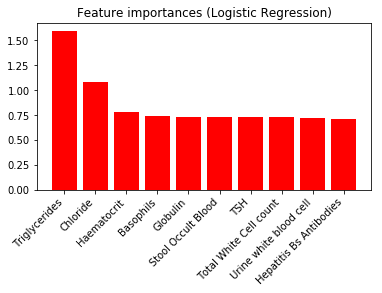

In [14]:
# Indices starts from 0

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]], color="r", align="center")
plt.xticks(range(10), X.columns[indices[:10]-1], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

In [ ]:
# logreg / clf / knn / lda / gnb / svm

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))